In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

#from wordcloud import STOPWORDS

sns.set_style("whitegrid")

In [6]:
import string
import nltk #Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import STOPWORDS
from datetime import datetime

In [3]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tonhua/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tonhua/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/tonhua/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
review = pd.read_csv("data/reivew_business_user.csv")
review = review[review.city == 'Madison']

In [5]:
review.shape

(29688, 43)

In [0]:
stopword = stopwords.words('english')

## Frequent Exists Words count

1. convert text to lowercase
2. word tokenize

In [0]:
tokenizer = RegexpTokenizer(r'\w+')
words = []

for i in review.text.head():
    word_tokens = tokenizer.tokenize(i.lower())
    removing_stopwords = [word for word in word_tokens if word not in stopword]
    freq = FreqDist(removing_stopwords)

In [0]:
def text_to_freqdist(text):
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer() #add
    word_tokens = tokenizer.tokenize(text.lower())
    word_lemmatized = [lemmatizer.lemmatize(w) for w in word_tokens] #add
    removing_stopwords = [word for word in word_lemmatized if word not in stopword]
    freq = FreqDist(removing_stopwords)
    return freq

In [0]:
review_freqdist = review.text.apply(text_to_freqdist)

In [52]:
review_freqdist.head()

0    {'usually': 1, 'fan': 1, 'pub': 1, 'mostly': 1...
1    {'stopped': 1, 'babe': 1, 'friday': 1, 'night'...
2    {'nice': 1, 'atmosphere': 1, 'good': 2, 'servi...
3    {'ok': 2, 'place': 1, 'better': 2, 'steak': 1,...
4    {'finally': 1, 'chance': 1, 'meal': 2, 'great'...
Name: text, dtype: object

In [0]:
review['freqdist'] = review_freqdist

In [0]:
word_list = []
for dic in review_freqdist:
    for word in dic.keys():
        word_list.append(word)


In [0]:
def plot_word_distribution(X, word_list):

  length = len(word_list)
  height = (((length-1)//4) + 1) * 4
  row = (length-1)//4 + 1

  if length <= 4:
    column = length
  else:
    column = 4

  fig, ax = plt.subplots(row, column, figsize = (15, height))
  axes = ax.ravel()

  for index, word in enumerate(word_list):
    word_occur_list = []
    for dictionary in X.freqdist:
      if word in dictionary.keys(): 
        word_occur_list.append(1)
        #key_word_list.append(i[key_word])
      else:
        word_occur_list.append(0)
    axis = sns.barplot(x = X.review_stars, y = word_occur_list, estimator = np.mean, ci=None, ax = axes[index])
    axis.set(ylabel='mean occurence')
    axis.set_title(word)
    
  plt.tight_layout()

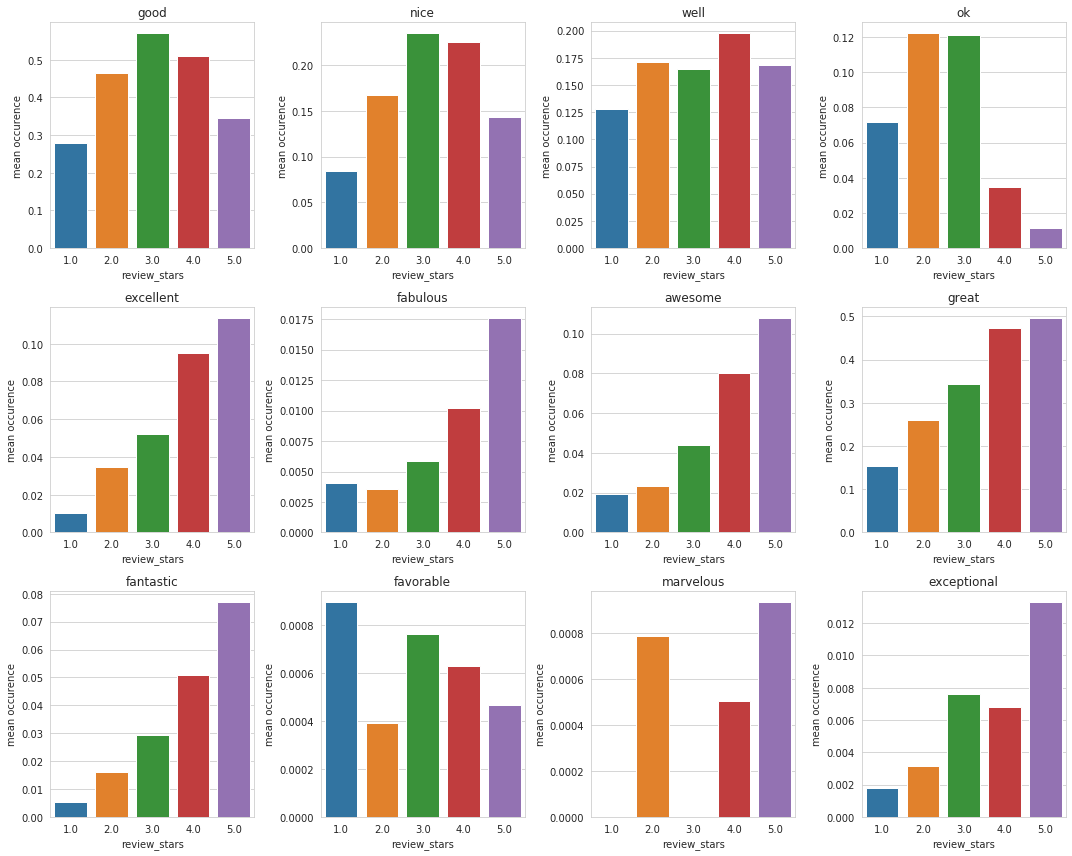

In [56]:
good_word_list = ["good", "nice", "well", "ok",\
           "excellent", "fabulous", "awesome", "great", \
           "fantastic", "favorable", "marvelous", "exceptional"]
plot_word_distribution(review, good_word_list)

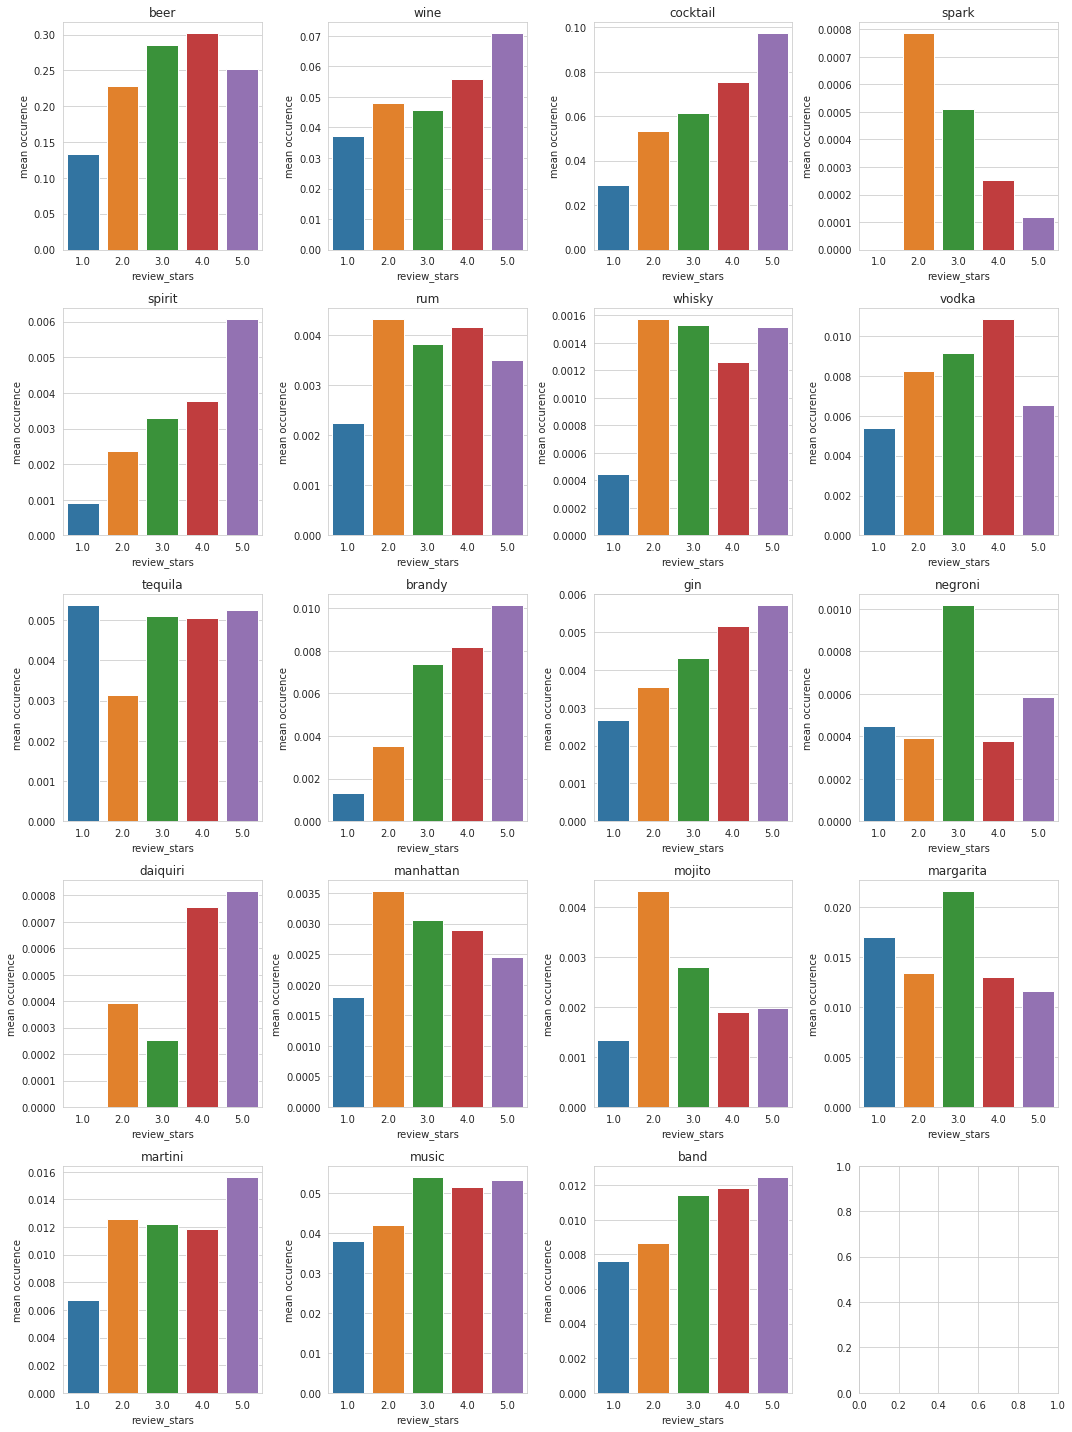

In [57]:
drink_list = ["beer", "wine", "cocktail", "spark",\
           "spirit", "rum", "whisky", 'vodka', \
           "tequila", "brandy", "gin", "negroni", \
           'daiquiri', 'manhattan', 'mojito', 'margarita', \
           'martini', 'music', 'band']
plot_word_distribution(review, drink_list)

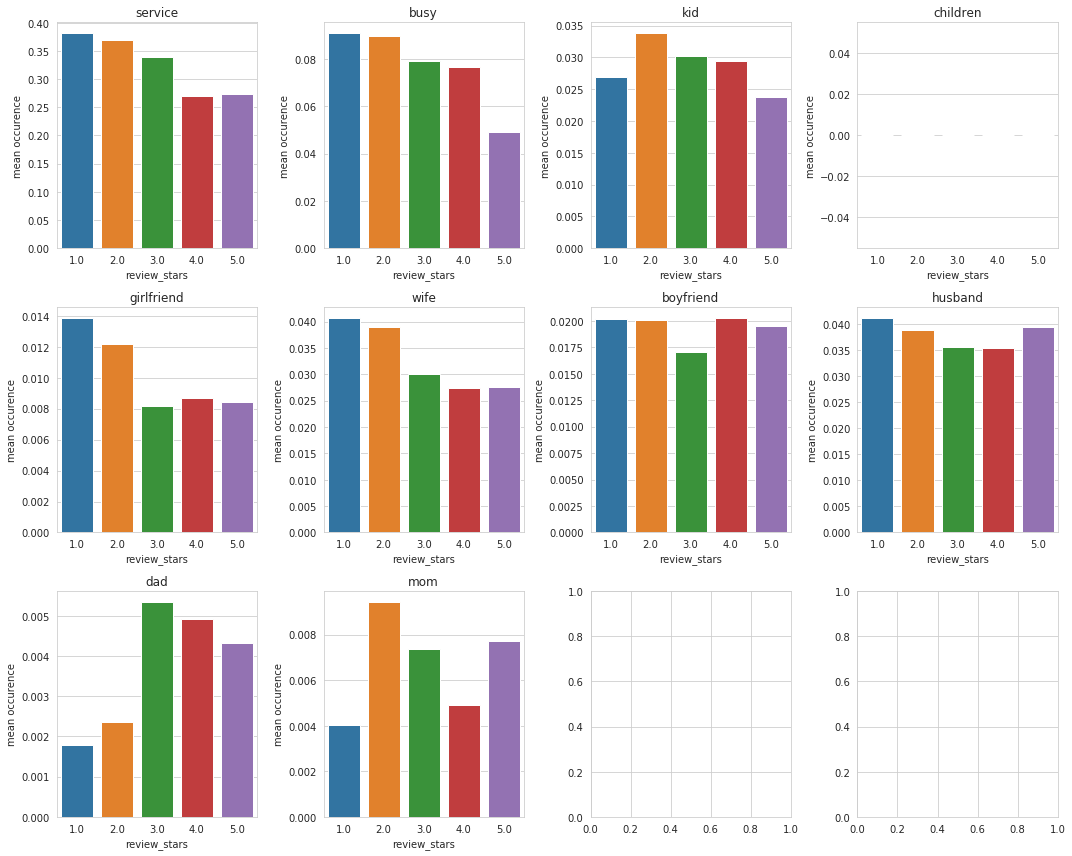

In [58]:
keyword = ["service", "busy", "kid", "children",\
           "girlfriend", "wife", "boyfriend", "husband",\
           "dad", "mom"]
plot_word_distribution(review, keyword)

In [59]:
review.groupby('review_stars').count()

,attributes,business_id,categories,city,hours,is_open,latitude,longitude,business_name,business_review_count,business_stars,state,is_bar,is_nightlife,review_cool,date,review_funny,review_id,text,review_useful,user_id,user_average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,user_cool,elite,fans,friends,user_funny,user_name,user_review_count,user_useful,yelping_since,freqdist
review_stars,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,2224,2232,2232,2232,2150,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,215,2232,2232,2232,2232,2232,2232,2232,2232
2.0,2536,2544,2544,2544,2481,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,2544,650,2544,2544,2544,2544,2544,2544,2544,2544
3.0,3923,3929,3929,3929,3849,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,3929,1863,3929,3929,3929,3929,3929,3929,3929,3929
4.0,7915,7926,7926,7926,7813,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926,3604,7926,7926,7926,7926,7926,7926,7926,7926
5.0,8556,8563,8563,8563,8500,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,8563,2275,8563,8563,8563,8563,8563,8563,8563,8563


In [0]:
def word_review(X, word):

    count = 0 

    for i, row in X.freqdist.iteritems():
      if word in row.keys():
          print(X.loc[i, "review_stars"]) 
          print(X.loc[i, "text"])
          count += 1
      if count == 10:
          break


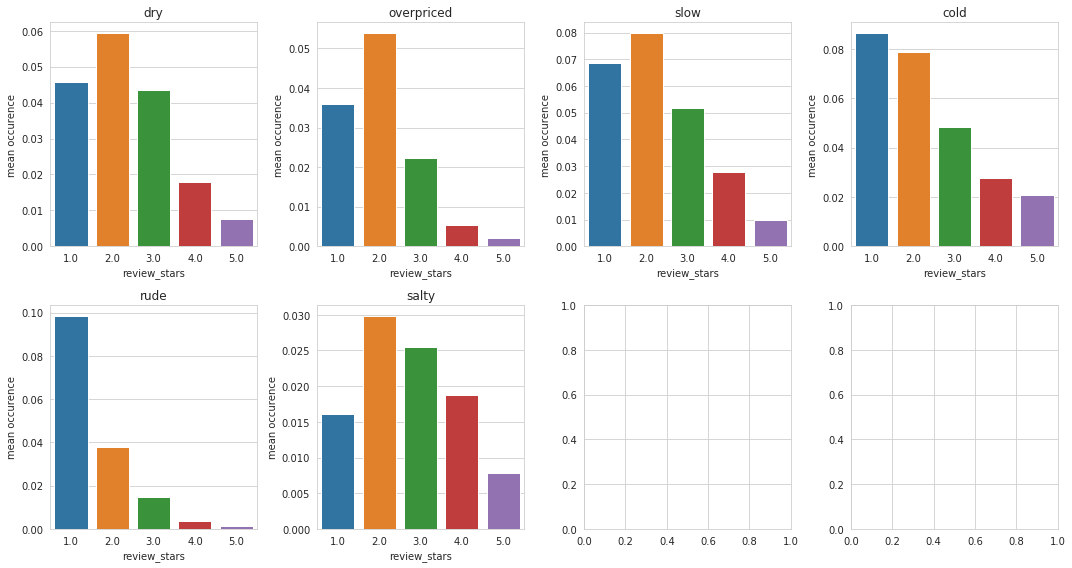

In [62]:
bad_word_list = ['dry', 'overpriced', 'slow', 'cold',\
                 'rude', "salty"]
plot_word_distribution(review, bad_word_list)

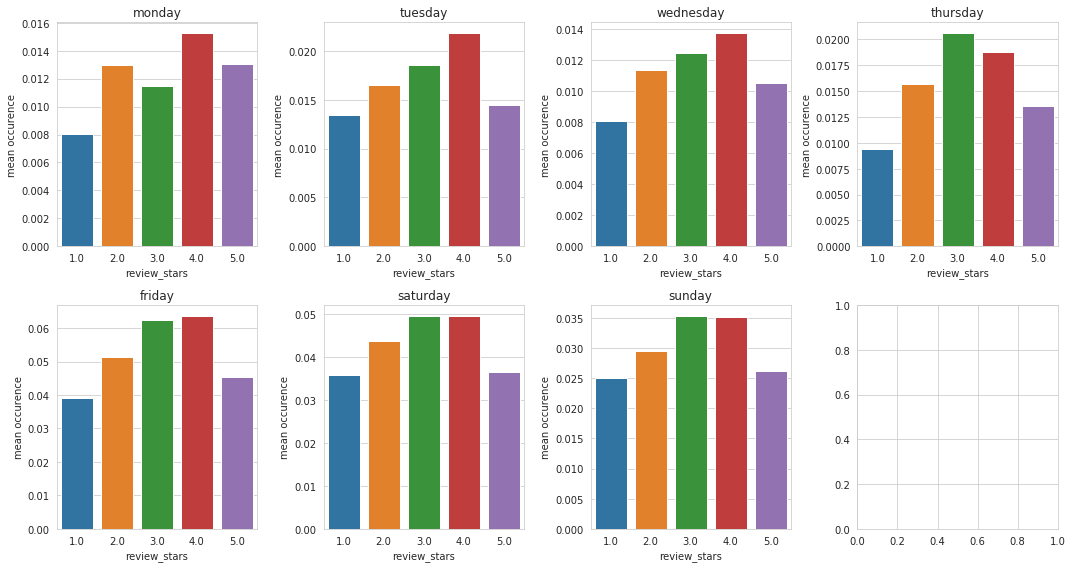

In [63]:
week_list = ['monday', 'tuesday', 'wednesday', 'thursday',\
                 'friday', "saturday", "sunday"]
plot_word_distribution(review, week_list)

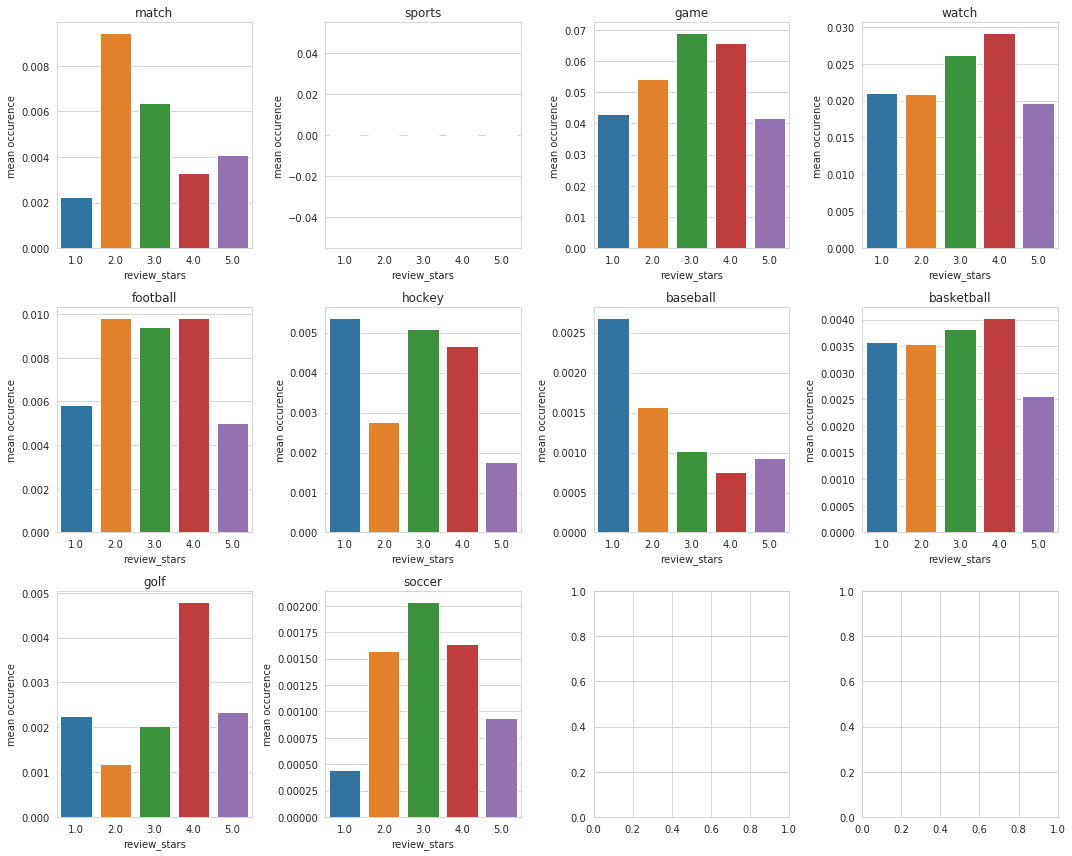

In [64]:
sports_list = ['match', 'sports', 'game', 'watch', \
               'football', 'hockey', 'baseball', 'basketball', \
               'golf', 'soccer']
plot_word_distribution(review, sports_list)

In [0]:
## TF-IDF

In [8]:
wisc_data=review
business_id = wisc_data.business_id.unique()
text_data = list()

In [9]:
for idx in business_id:
    temp_data = wisc_data[wisc_data['business_id']==idx]
    text = ' '.join(temp_data['text'])
    text_data.append(text)
    
vectorizer=CountVectorizer()
transformer=TfidfTransformer()
tfidf=transformer.fit_transform(vectorizer.fit_transform(text_data))
word=vectorizer.get_feature_names()
weight=tfidf.toarray()

In [10]:
df=pd.DataFrame(weight.T,columns=business_id,index=word)
df['word'] = word

del word
del weight

## Top 3 Reviews Business

In [11]:
review_count=wisc_data['business_id'].value_counts()

df[review_count.keys()[1]].sort_values(ascending=False).keys()[0:10]
stp=STOPWORDS
stp=list(stp)
row_list = df[df['word'].isin(stp)].index.tolist() 
df = df.drop(row_list)
r1=df[review_count.keys()[0]].sort_values(ascending=False)[:10]
wisc_data[wisc_data['business_id']==review_count.keys()[0]]['business_name'].unique()
r2=df[review_count.keys()[1]].sort_values(ascending=False)[:10]
wisc_data[wisc_data['business_id']==review_count.keys()[1]]['business_name'].unique()
r3=df[review_count.keys()[2]].sort_values(ascending=False)[:10]
wisc_data[wisc_data['business_id']==review_count.keys()[2]]['business_name'].unique()


array(['Merchant'], dtype=object)

In [12]:
top_3_reviews=pd.DataFrame({'word1':list(r1.keys()),
                            wisc_data[wisc_data['business_id']==review_count.keys()[0]]['business_name'].unique()[0]:list(r1),
                            'word2':list(r2.keys()),
                            wisc_data[wisc_data['business_id']==review_count.keys()[1]]['business_name'].unique()[0]:list(r2),
                            'word3':list(r3.keys()),
                            wisc_data[wisc_data['business_id']==review_count.keys()[2]]['business_name'].unique()[0]:list(r3)})



In [13]:
top_3_reviews

,word1,The Old Fashioned,word2,The Great Dane Pub & Brewing Company,word3,Merchant
0,curds,0.157137,dane,0.181560,merchant,0.207643
1,cheese,0.154107,beer,0.126171,cocktails,0.077333
2,fashioned,0.143406,great,0.119514,food,0.073040
3,old,0.099974,food,0.093710,good,0.055879
4,food,0.076934,good,0.091378,drinks,0.054994
5,good,0.075579,place,0.058138,great,0.053903
6,great,0.068677,cheese,0.053095,menu,0.052900
7,burger,0.066458,burger,0.052464,cocktail,0.049495
8,place,0.062552,pub,0.050416,cheese,0.044373
9,wisconsin,0.062213,beers,0.044074,place,0.042892


## Top 3 Stars Busines

In [14]:
wisc_data['review_stars'].mean()

avg_stars=list()
business_name=list()
for idx in business_id:
    temp_data = wisc_data[wisc_data['business_id']==idx]
    mean = temp_data['review_stars'].mean()
    name = temp_data['business_name'].unique()[0]
    avg_stars.append(mean)
    business_name.append(name)

In [15]:
stars_data=pd.DataFrame({'business_id':business_id,
                         'business_name':business_name,
                         'avg_stars':avg_stars})
stars_data=stars_data.sort_values(by='avg_stars',ascending=False)
s1=df[stars_data['business_id'][300]].sort_values(ascending=False)[:10]
s2=df[stars_data['business_id'][227]].sort_values(ascending=False)[:10]
s3=df[stars_data['business_id'][242]].sort_values(ascending=False)[:10]

In [16]:
top_3_stars=pd.DataFrame({'word1':list(s1.keys()),
                          stars_data['business_name'][300]:list(s1),
                          'word2':list(s2.keys()),
                          stars_data['business_name'][227]:list(s2),
                          'word3':list(s3.keys()),
                          stars_data['business_name'][242]:list(s3)})

In [17]:
top_3_stars

,word1,Prairie Fire,word2,Freiburg Gastropub,word3,Kung Fu Tea
0,coffee,0.327570,german,0.334983,tea,0.520792
1,chia,0.235260,freiburg,0.162567,bubble,0.260308
2,prairie,0.148596,schnitzel,0.095331,milk,0.254880
3,frio,0.105751,food,0.087176,kung,0.208247
4,coffees,0.103245,beer,0.077049,fu,0.203249
5,oreo,0.090354,germany,0.069318,bubbles,0.187643
6,fire,0.083946,good,0.060776,boba,0.161944
7,oreos,0.080477,great,0.060524,taro,0.122665
8,lattes,0.071893,mustard,0.055794,kungfu,0.099665
9,caffeine,0.070809,beers,0.050848,sencha,0.072544


In [18]:
l1=df[stars_data['business_id'][309]].sort_values(ascending=False)[:10]
l2=df[stars_data['business_id'][308]].sort_values(ascending=False)[:10]
l3=df[stars_data['business_id'][307]].sort_values(ascending=False)[:10]

last_3_stars=pd.DataFrame({'word1':list(l1.keys()),
                          stars_data['business_name'][309]:list(l1),
                          'word2':list(l2.keys()),
                          stars_data['business_name'][308]:list(l2),
                          'word3':list(l3.keys()),
                          stars_data['business_name'][307]:list(l3)})

In [19]:
last_3_stars

,word1,Mercury Cafe,word2,Mr Roberts,word3,Cuco's Mexican Fusion
0,mercury,0.195570,roberts,0.319699,mexican,0.193895
1,dj,0.149345,mr,0.167516,sushi,0.137592
2,rails,0.142111,bar,0.132525,upscale,0.111699
3,back,0.106112,place,0.093531,fusion,0.101703
4,tilts,0.104519,dive,0.076743,ivan,0.099225
5,merc,0.104519,best,0.070382,cuco,0.092832
6,tumbling,0.104519,collar,0.065203,salsa,0.080966
7,gait,0.104519,shelly,0.063940,guacamole,0.074683
8,patio,0.103692,pool,0.061258,margs,0.073849
9,stockpile,0.097785,divey,0.060535,tai,0.070975


### Match day realted analysis
Here we analysis the influence on match data from 2 perspectives:
* Whether the scores will be changed during the match day
* Whether the scores will be changed from the match day to the day after the match

In [20]:
total_madison = review

In [21]:
total_madison['datetime'] = total_madison['date'].apply(\
                                lambda x: datetime.strptime(x,'%Y-%m-%d %X'))
total_madison['year'] = total_madison['datetime'].dt.year
total_madison['month'] = total_madison['datetime'].dt.month
total_madison['dow'] = total_madison['datetime'].dt.dayofweek
total_madison['woy'] = total_madison['datetime'].dt.weekofyear
total_madison['hour'] = total_madison['datetime'].dt.hour

In [22]:
def condition(df):
    condition1 = (df['year'] == 2018) & \
                          ((df['woy'] in list(range(35,48))) | (df['woy']==52)) & \
                         (df['dow'] in [5,6])
    condition2 = (df['year'] == 2017) & \
                          (df['woy'] in list(range(35,49))) & \
                         (df['dow'] in [5,6])
    condition3 = (df['year'] == 2017) & \
                          (df['woy'] == 52) & \
                         (df['dow'] in [3,4])
    condition4 = (df['year'] == 2016) & \
                          ((df['woy'] in list(range(35,49))) | (df['woy']==52)) & \
                         (df['dow'] in [5,6])
    condition5 = (df['year'] == 2017) & \
                          (df['woy'] == 1) & \
                         (df['dow'] in [0,1])
    return(1 if any([condition1,condition2,condition3,condition4,condition5]) else 0)

def condition_short(df):
    condition1 = (df['year'] == 2018) & \
                          ((df['woy'] in list(range(35,48))) | (df['woy']==52)) & \
                         (df['dow'] == 5)
    condition2 = (df['year'] == 2017) & \
                          (df['woy'] in list(range(35,49))) & \
                         (df['dow'] == 5)
    condition3 = (df['year'] == 2017) & \
                          (df['woy'] == 52) & \
                         (df['dow'] == 3)
    condition4 = (df['year'] == 2016) & \
                          ((df['woy'] in list(range(35,49))) | (df['woy']==52)) & \
                         (df['dow'] == 5)
    condition5 = (df['year'] == 2017) & \
                          (df['woy'] == 1) & \
                         (df['dow'] == 0)
    return(1 if any([condition1,condition2,condition3,condition4,condition5]) else 0)
    

In [23]:
total_madison['ismatch'] = total_madison.apply(condition,axis = 1)

(array([165.,   0., 117.,   0., 141.,   0., 325.,   0., 472.]),
 array([0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]),
 <a list of 9 Patch objects>)

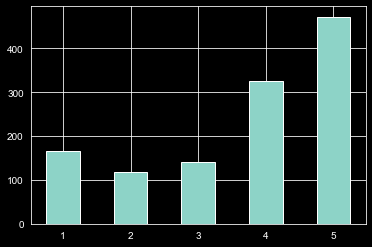

In [24]:
plt.style.use('dark_background')
plt.hist(total_madison[total_madison['ismatch'] == 1].review_stars,\
        bins = [i/2-0.25 for i in range(2,12)])

(array([1216.,    0., 1171.,    0., 1785.,    0., 3500.,    0., 4788.]),
 array([0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]),
 <a list of 9 Patch objects>)

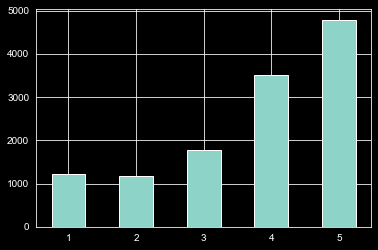

In [25]:
plt.hist(total_madison[(total_madison['ismatch'] == 0) & \
                      (total_madison['year'].isin([2016,2017,2018]))].review_stars,\
        bins = [i/2-0.25 for i in range(2,12)])

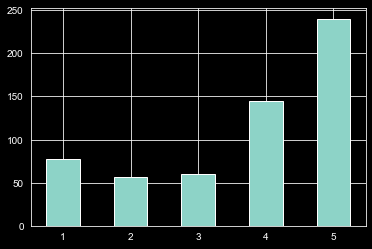

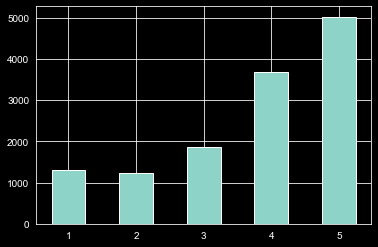

In [26]:
total_madison['ismatch_short'] = total_madison.apply(condition_short,axis = 1)
plt.style.use('dark_background')
plt.hist(total_madison[total_madison['ismatch_short'] == 1].review_stars,\
        bins = [i/2-0.25 for i in range(2,12)])
plt.show()
plt.style.use('dark_background')
plt.hist(total_madison[(total_madison['ismatch_short'] == 0) & \
                      (total_madison['year'].isin([2016,2017,2018]))].review_stars,\
        bins = [i/2-0.25 for i in range(2,12)])
plt.show()